In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../data/mouse_drug_data.csv"
clinical_trial_data_to_load = "../data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinic_mouse_df = pd.merge(clinical_data_df, mouse_data_df, how="left", on="Mouse ID")

# Display the data table for preview
clinic_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_df = clinic_mouse_df.groupby(["Drug", "Timepoint"])


# Convert to DataFrame
mean_tumor_df = group_df["Tumor Volume (mm3)"].mean()
mean_tumor_df = mean_tumor_df.reset_index()


# Preview DataFrame
mean_tumor_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sterr = group_df["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_sterr_df = tumor_sterr.reset_index()

# Preview DataFrame
tumor_sterr_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_summary_df = mean_tumor_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")


# Preview DataFrame
tumor_summary_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# create drugs and timepoint lists
drugs = clinic_mouse_df.sort_values("Drug")["Drug"].unique()
timepoint = [x for x in np.arange(0, 50, step=5)]

# set markers and colors
mkrs = ["o", "^", "s", "d", "x", "*", "+", "v", "<", ">"]
clrs = ["#ff0000", "#e4e400", "#00ff00", "#00ffff", "#4949ff", "#ff00ff", "#bababa", "#b00000", "#baba00", "#00b000"]


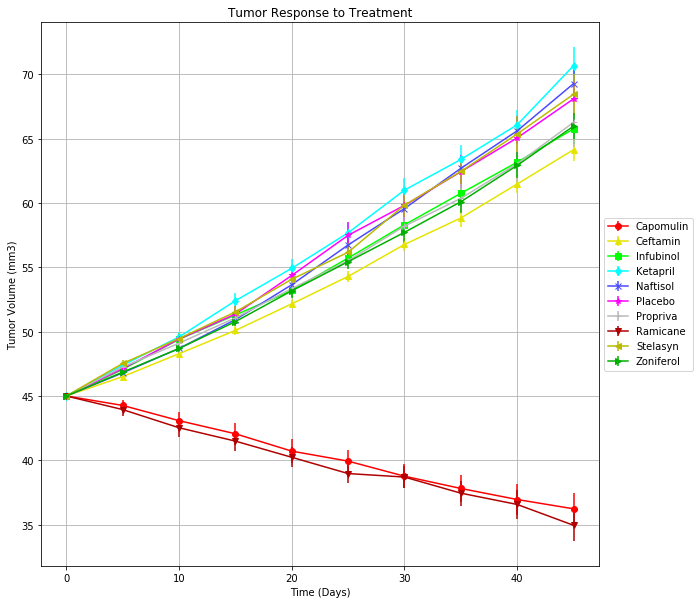

In [6]:
# set figsize
fig, ax = plt.subplots(figsize=(10, 10))


# plot tumor response for all drugs (with Error Bars)
for i in range(len(drugs)):
    err_data = tumor_sterr_df.loc[tumor_sterr_df["Drug"]==drugs[i], "Tumor Volume (mm3)"]
    ax.errorbar(timepoint, tumor_summary_df[drugs[i]], yerr=err_data, 
                    color=clrs[i], marker=mkrs[i], label=drugs[i])


# set title and x,y labels
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")


# set legend
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))


# set grid
plt.grid()


# Save the Figure
plt.savefig("tumor_response.png")


# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_sites = group_df["Metastatic Sites"].mean()


# Convert to DataFrame
meta_sites_df = mean_meta_sites.reset_index()


# Preview DataFrame
meta_sites_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sterr = group_df["Metastatic Sites"].sem()


# Convert to DataFrame
meta_sterr_df = meta_sterr.reset_index()


# Preview DataFrame
meta_sterr_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
meta_summary_df = meta_sites_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# preview DataFrame
meta_summary_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


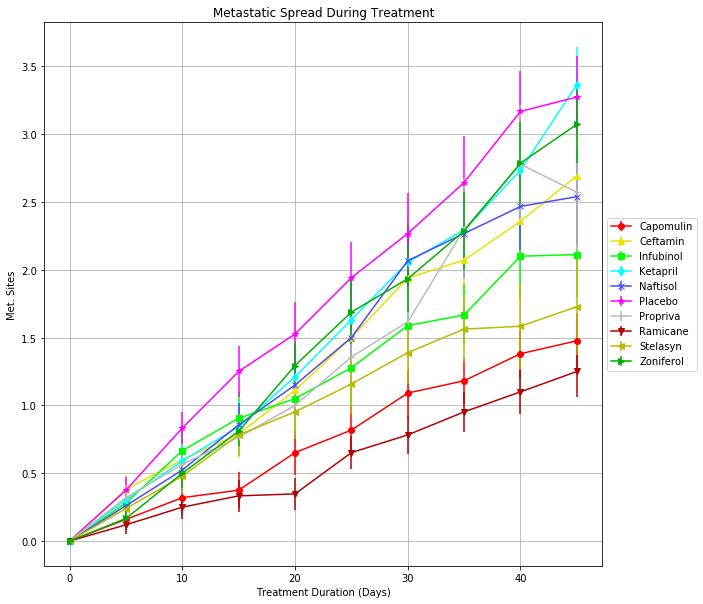

In [10]:
# set figsize
fig, ax = plt.subplots(figsize=(10, 10))


# plot metastatic spread for all drugs (with Error Bars)
for i in range(len(drugs)):
    err_data = meta_sterr_df.loc[meta_sterr_df["Drug"]==drugs[i], "Metastatic Sites"]
    ax.errorbar(timepoint, meta_summary_df[drugs[i]], yerr=err_data, 
                    color=clrs[i], marker=mkrs[i], label=drugs[i])


# set title and labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")


# create and place legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))


# set grid
plt.grid()


# save figure
plt.savefig("meta_spread.png")


# show figure
plt.show()


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = group_df["Mouse ID"].count()


# Convert to DataFrame
mouse_count_df = mouse_count.reset_index()


# Preview DataFrame
mouse_count_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouse_summary_df = mouse_count_df.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

# preview the DataFrame
mouse_summary_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [13]:
# convert mouse count to percents
survival_dict={}
for drug in drugs:
    survival_dict[drug] = mouse_summary_df[drug] / mouse_summary_df[drug][0] *100
survival_df = pd.DataFrame(survival_dict)

# store standard error
survival_sterr = survival_df.sem()


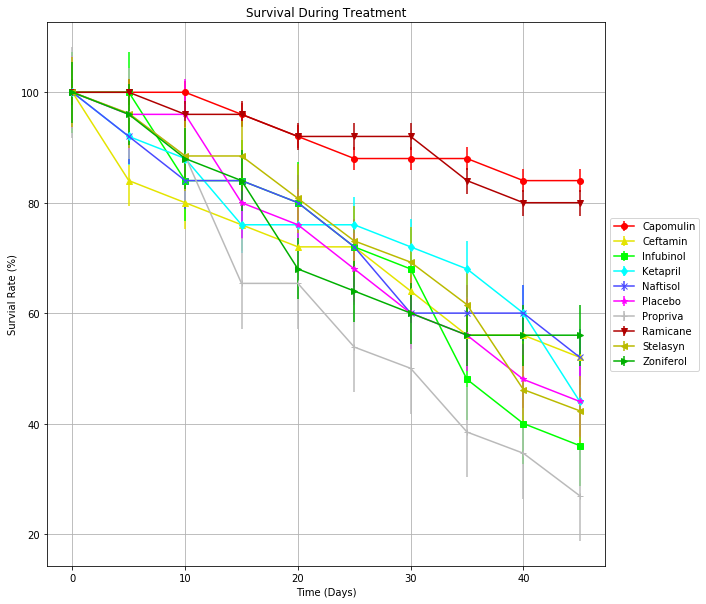

In [14]:
# set figure size
fig, ax = plt.subplots(figsize=(10, 10))


# plot mouse survival for all drugs (with Error Bars)
for i in range(len(drugs)):
    ax.errorbar(timepoint, survival_df[drugs[i]], yerr=survival_sterr[drugs[i]], 
                    color=clrs[i], marker=mkrs[i], label=drugs[i])


# create title and x,y labels
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survial Rate (%)")


# create legend
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))


# set grid
plt.grid()


# save figure
plt.savefig("treatment_survival.png")


# show figure
plt.show()


## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
pct_change = [(tumor_summary_df[drug][45] - tumor_summary_df[drug][0]) / tumor_summary_df[drug][0] *100 
                  for drug in drugs]

percent_change_df = pd.DataFrame({
    "Drug" : drugs,
    "% Change" : pct_change
}).set_index("Drug")


# Display the data to confirm
percent_change_df


,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


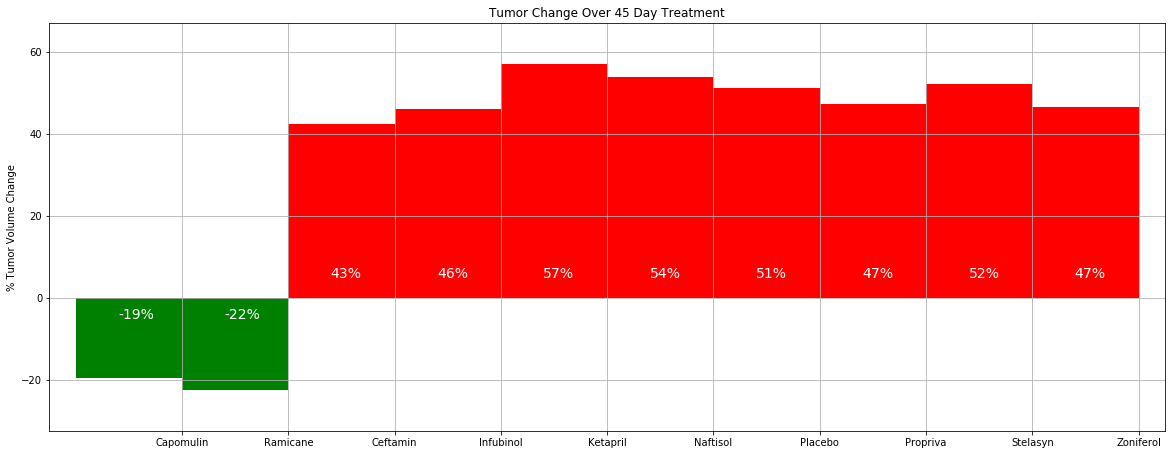

In [16]:
# sort positive and negative tumor growth changes per drug
pos_change = percent_change_df.loc[percent_change_df["% Change"] < 0]
neg_change = percent_change_df.loc[percent_change_df["% Change"] >= 0]


# create figure and set figsize
fig = plt.figure(figsize=(20, 7.5))
ax = plt.subplot(111)


# separate and plot positive and negative growths
pos_bar = ax.bar(np.arange(0, len(pos_change), step=1), pos_change["% Change"], width=1, color="g", align="edge")
neg_bar = ax.bar(np.arange(len(pos_change), len(pos_change)+len(neg_change), step=1), neg_change["% Change"], 
            width=1, color="r", align="edge")


# add title, grid, labels
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid()

plt.ylabel("% Tumor Volume Change")
x_axis = np.arange(0, len(drugs), step=1)
plt.xticks(x_axis +1, pos_change.index.append(neg_change.index))



# label percentages
for bar in pos_bar:
    plt.text(bar.get_x() +0.4, -5, s="{}%".format(int(round(bar.get_height()))), color="w", fontsize=14)
for bar in neg_bar:
    plt.text(bar.get_x() +0.4, 5, s="{}%".format(int(round(bar.get_height()))), color="w", fontsize=14)


# set xlim and ylim
plt.xlim(-0.25, len(drugs)+0.25)
plt.ylim(min(pos_change["% Change"])-10, max(neg_change["% Change"])+10)


# save figure
plt.savefig("tumor_change_over_time.png")


# show figure
fig.show()


## Observations

The best performing drugs are Capomulin and Ramicane which have shown to reduce the size of a tumor by 19% and 22% respectively over the experimental period of 45 days. 
For the remainder of the drugs, the tumor reacted similarly to if the mouse had not taken any drugs.